In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [35]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import itertools

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X_all_train = train_data.drop(['label'], axis = 1)
X_all_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
Y_all_train = train_data["label"]
Y_all_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [42]:
X_all_train = X_all_train / 255

In [43]:
X_all_train = X_all_train.values.reshape(-1,28,28,1)

In [44]:
random_seed = 2

In [45]:
X_train, X_val, Y_train, Y_val = train_test_split(X_all_train, Y_all_train, test_size = 0.1, random_state=random_seed)

In [46]:
len(X_val)

4200

In [47]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = "relu", name='my_dense'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [48]:
from keras.models import Model
layer_name='my_dense'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928 

In [49]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [50]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [51]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [53]:
epochs = 30
batch_size = 86

In [54]:
history = model.fit(datagen.flow(X_train,Y_train,batch_size = batch_size), epochs = epochs, validation_data = (X_val,Y_val), verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size, callbacks=[learning_rate_reduction])

Epoch 1/30
439/439 - 13s - loss: 0.3854 - accuracy: 0.8765 - val_loss: 0.0829 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 2/30
439/439 - 13s - loss: 0.1216 - accuracy: 0.9637 - val_loss: 0.0418 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 3/30
439/439 - 14s - loss: 0.0942 - accuracy: 0.9715 - val_loss: 0.0386 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 4/30
439/439 - 14s - loss: 0.0748 - accuracy: 0.9772 - val_loss: 0.0298 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 5/30
439/439 - 12s - loss: 0.0661 - accuracy: 0.9807 - val_loss: 0.0396 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 6/30
439/439 - 13s - loss: 0.0668 - accuracy: 0.9805 - val_loss: 0.0289 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 7/30
439/439 - 13s - loss: 0.0614 - accuracy: 0.9821 - val_loss: 0.0235 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 8/30
439/439 - 14s - loss: 0.0575 - accuracy: 0.9833 - val_loss: 0.0242 - val_accuracy: 0.9919 - lr: 0.0010
Epoch 9/30
439/439 - 13s - loss: 0.0601 - accuracy: 0.9828 - val_loss: 0.0266 - val_accu

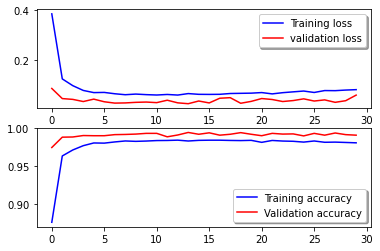

In [55]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [56]:
intermediate_output = intermediate_layer_model.predict(X_train) 
intermediate_output = pd.DataFrame(data=intermediate_output)

In [57]:
intermediate_output

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.544241,0.000000,2.201602,0.000000,0.151386,0.399390,1.780115,0.262179,1.491921,0.000000,...,2.642236,0.619899,0.861415,0.586425,2.785991,0.038478,2.272478,2.177519,1.058480,0.000000
1,2.121741,0.000000,1.574467,1.278392,0.000000,1.547310,0.282221,0.480178,1.381143,0.000000,...,0.000000,1.496704,0.000000,0.341349,0.000000,0.000000,0.000000,0.370067,0.000000,0.000000
2,0.144464,1.170432,1.802235,0.000000,0.000000,1.430967,0.853350,0.000000,0.255193,0.119707,...,0.000000,0.262757,0.000000,0.420238,1.774087,0.000000,0.000000,0.951425,0.000000,0.000000
3,2.369921,0.000000,1.016628,0.000000,0.000000,3.231337,1.440567,1.554545,0.681110,0.000000,...,0.911093,2.647480,0.000000,0.000000,0.000000,0.000000,2.358997,0.000000,0.000000,1.904432
4,0.000000,0.000000,0.000000,0.000000,0.208114,0.941725,0.000000,0.000000,0.000000,0.000000,...,0.204458,0.598138,0.746854,0.000000,1.326443,0.847046,0.804305,0.000000,0.000000,0.632150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37795,1.835793,0.000000,1.660097,1.958982,0.000000,2.110745,0.000000,0.000000,0.425454,0.000000,...,0.000000,1.563626,0.073413,0.004834,0.000000,0.144639,0.000000,0.000000,0.000000,0.269907
37796,0.538282,0.301161,1.154094,0.173109,0.000000,1.128639,0.517562,0.058617,0.372495,0.000000,...,0.000000,0.779198,0.000000,0.042056,0.475626,0.000000,0.000000,0.158788,0.000000,0.000000
37797,1.860187,0.000000,2.598216,1.702432,0.000000,1.300928,0.984880,1.870035,3.035806,0.000000,...,2.520084,2.013746,0.000000,2.747882,0.000000,0.674319,0.706397,2.258372,0.000000,1.487339
37798,0.372686,0.807812,1.589972,0.000000,0.000000,1.355740,0.580792,0.000000,0.525001,0.172235,...,0.000000,0.265218,0.000000,0.255386,1.580906,0.000000,0.000000,0.515294,0.000000,0.000000


In [58]:
val_data = intermediate_layer_model.predict(X_val)

In [59]:
val_data = pd.DataFrame(data=val_data)

In [60]:
val_data

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000000,0.000000,0.000000,0.000000,1.178301,0.073584,0.000000,0.759003,1.279279,2.145129,...,2.217935,0.058523,2.227616,0.428933,1.750857,2.172453,1.852677,0.000000,0.000000,1.714831
1,0.534867,0.944474,2.281078,0.000000,0.000000,1.260938,1.213692,0.011586,0.874043,0.000000,...,0.000000,0.753864,0.000000,0.901174,1.505220,0.000000,0.000000,1.104910,0.220519,0.000000
2,0.049134,0.000000,0.027959,0.140032,1.884812,2.268872,0.000000,0.496184,0.000000,0.595152,...,0.060145,2.730808,1.759012,0.000000,1.302394,1.733612,2.139619,0.000000,0.406583,2.154224
3,1.714073,0.000000,1.692196,1.698194,0.176081,1.852261,0.000000,0.100884,0.741852,0.000000,...,0.000000,1.560181,0.393629,0.228130,0.000000,0.459983,0.132391,0.000000,0.000000,0.466617
4,0.059484,1.023869,1.962419,0.000000,0.000000,1.885439,0.537227,0.000000,0.176684,0.580127,...,0.000000,0.126608,0.000000,0.732260,2.067957,0.000000,0.000000,0.716349,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.426973,0.393988,0.000000,0.000000,0.459292,0.000000,0.125013,0.463370,1.223538,0.296925,...,0.000000,0.816086,0.000000,0.000000,0.725233,0.458530,0.129199,0.111662,0.000000,0.000000
4196,0.573142,0.489361,0.000000,0.232938,0.580449,0.000000,0.181909,0.717782,1.592711,0.153710,...,0.000000,0.971906,0.000000,0.345126,0.631422,0.498139,0.062185,0.152648,0.000000,0.000000
4197,3.064778,0.000000,3.286329,2.709519,0.000000,1.990035,0.944022,2.131969,3.091128,0.000000,...,1.830410,3.034240,0.000000,2.852014,0.000000,1.675075,0.708204,1.674108,0.000000,1.398014
4198,2.401446,0.000000,2.297218,1.123102,0.000000,1.780279,0.880936,1.353743,2.252853,0.000000,...,1.536834,1.503218,0.114731,1.221013,0.381546,1.169840,1.090485,1.244877,0.000000,1.426970


In [61]:
from xgboost import XGBClassifier

xgbmodel = XGBClassifier(objective='multi:softprob', 
                      num_class= 10)
xgbmodel.fit(intermediate_output, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=10, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
Y_pred = xgbmodel.predict(val_data)
print(accuracy_score(Y_val, Y_pred))

0.9940476190476191


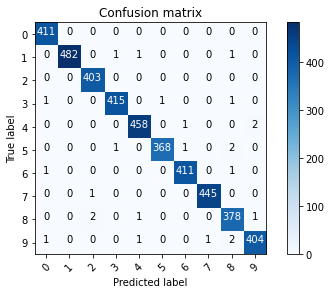

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
# Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
# Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = Y_val
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [64]:
tf.keras.backend.clear_session()